# Описание проекта

Подготовьте прототип модели машинного обучения для «N». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import math

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression




df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Посмотрим информацию о признаках

## 1.1 Обучающая выборка

In [2]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
df_train.filter(regex=("final.*"))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292
...,...,...,...,...,...,...,...,...,...
16855,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220
16856,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542
16857,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616
16858,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879


## 1.2 Тестовая выборка

In [6]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [8]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


## 1.3 Полная выборка

In [9]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [11]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


## 1.4 Промежуточный вывод
Признак **date** можно преобразовать в DateTime. <br>
Во многих признаках есть пропуски. Заполним предшествующими значениями <br>
Есть нулевые и близкие к нулю значения, возможно они являются выбросами, взглянем потом на графики распределения


## 1.5 Преобразование данных и заполнение пропусков

In [12]:
# Преобразуем дату
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Отсортируем выборки по дате

In [13]:
df_train = df_train.sort_values(by='date')
df_test = df_test.sort_values(by='date')
df_full = df_full.sort_values(by='date')

Заполним предшествующими значениями <br>
`После  заполнения пропусков, выборка ухудшается: на графиках распредления увеличивается выброс в районе нуля, ошибка MAE для расчетного значения эффективности сильно возрастает и ухудшаются модели`

In [14]:
"""
df_full.fillna( method ='ffill', inplace = True) 
df_test.fillna( method ='ffill', inplace = True) 
df_train.fillna( method ='ffill', inplace = True) 
"""
df_full.dropna(inplace = True) 
df_test.dropna(inplace = True) 
df_train.dropna(inplace = True) 

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  16094 non-null datetime64[ns]
final.output.concentrate_ag                           16094 non-null float64
final.output.concentrate_pb                           16094 non-null float64
final.output.concentrate_sol                          16094 non-null float64
final.output.concentrate_au                           16094 non-null float64
final.output.recovery                                 16094 non-null float64
final.output.tail_ag                                  16094 non-null float64
final.output.tail_pb                                  16094 non-null float64
final.output.tail_sol                                 16094 non-null float64
final.output.tail_au                                  16094 non-null float64
primary_cleaner.input.sulfate                         16094 non-null float64
primary_cleaner.input.depressant     

## 1.6 Эффективность обогащения

<img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg" width="500">

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [15]:
def get_recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    try:
        return (C * (F - T) / (F * (C - T))) * 100
    except:
        return 0

In [16]:
df_train['rougher.output.calc_recovery'] = df_train.apply(get_recovery, axis=1)

In [17]:
print('MAE:', mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.calc_recovery']))

MAE: 9.555596961987514e-15


Значение МАЕ достаточно низкое, можем сказать что эффективность рассчитана правильно с маленькой погрешностью

## 1.7 Признаки отсутствующие в тестовой выборке

In [18]:
not_in_test_cols = [col for col in df_train.columns if col not in df_test.columns]
not_in_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все эти признаки можно поделить на несколько типов:
- Финальные
- Выходные для текущего этапа тех.процесса (параметры продукта)
- Отвальные хвосты
- Рассчетные параметры

# 2. Анализ данных

## 2.1 Концентрация металлов (Au, Ag, Pb) 

In [19]:
substances = {
    'au':"Золото", 
    'pb':"Свинец", 
    'ag':"Серебро"
}
concentrates = {
    'rougher.input.feed_':"Сырьевой концетрат", 
    'rougher.output.concentrate_':"Черновой концентрат", 
    'primary_cleaner.output.concentrate_':"Концентрат после певричной очистки" ,
    'final.output.concentrate_':"Финальный концетрат"
}

**Золото**

In [20]:
concetrate_au_list = [key+'au' for key in concentrates.keys()]
df_concetrate_au = df_train[concetrate_au_list]
df_concetrate_au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


In [21]:
df_concetrate_au.describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,11017.000000,11017.000000,11017.000000,11017.000000
mean,8.107739,19.776788,32.380986,44.131636
std,1.790876,3.600455,5.328369,4.171270
min,0.010000,0.000000,0.000000,0.000000
25%,6.830117,18.835324,30.705889,43.243792
50%,7.865763,20.262237,33.017232,44.802196
75%,9.247575,21.662943,35.154232,46.092315
max,13.126043,28.146838,45.933934,51.571885


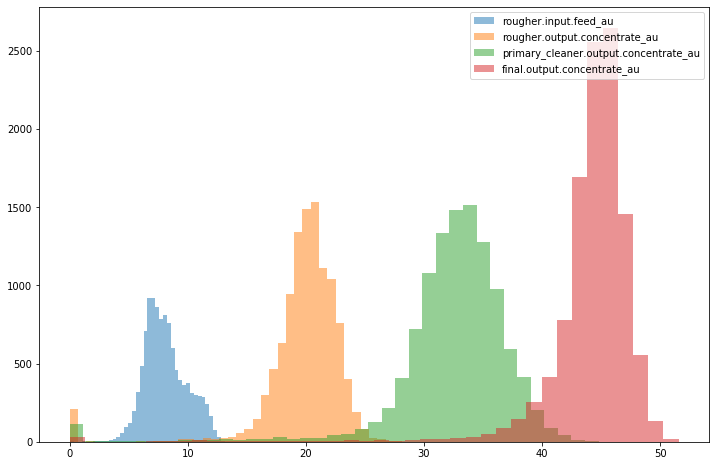

In [22]:
bins = 40
plt.figure(figsize=(12,8))
plt.tilte = 'Распределение золота'
for col in df_concetrate_au.columns:
    plt.hist(df_concetrate_au[col], bins, alpha=0.5, label=col)
plt.legend(loc='upper right')
plt.show()

С каждой фазой концентрация золота увеличивается. Есть небольшие выбросы около нуля

<hr>

**Серебро**

In [23]:
concetrate_ag_list = [key+'ag' for key in concentrates.keys()]
df_concetrate_ag = df_train[concetrate_ag_list]
df_concetrate_ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


In [24]:
df_concetrate_ag.describe()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,11017.000000,11017.000000,11017.000000,11017.000000
mean,8.773065,11.841982,8.437251,5.156333
std,1.883557,2.686593,1.888580,1.340491
min,0.010000,0.000000,0.000000,0.000000
25%,7.265261,10.460493,7.383838,4.231103
50%,8.366434,11.797794,8.436412,4.999314
75%,10.155859,13.494582,9.683331,5.852710
max,14.596026,21.725695,15.005789,16.001945


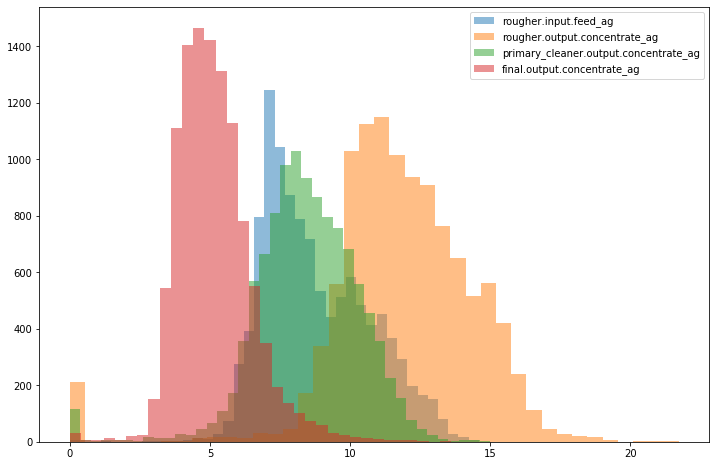

In [25]:
bins = 40
plt.figure(figsize=(12,8))
plt.tilte = 'Распределение серебра'
for col in df_concetrate_ag.columns:
    plt.hist(df_concetrate_ag[col], bins, alpha=0.5, label=col)
plt.legend(loc='upper right')
plt.show()

С каждой фазой концентрация серебра сначала увеличивается, потом уменьшается. Есть небольшие выбросы около нуля

<hr>

**Свинец**

In [26]:
concetrate_pb_list = [key+'pb' for key in concentrates.keys()]
df_concetrate_pb = df_train[concetrate_pb_list]
df_concetrate_pb.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


In [27]:
df_concetrate_pb.describe()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,11017.000000,11017.000000,11017.000000,11017.000000
mean,3.554777,7.612323,9.574924,10.172687
std,1.070501,1.718284,2.538084,1.589666
min,0.010000,0.000000,0.000000,0.000000
25%,2.805359,6.819439,8.351604,9.279625
50%,3.444287,7.708693,9.919856,10.347530
75%,4.256031,8.547192,11.226037,11.187018
max,7.142594,12.702148,17.081278,17.031899


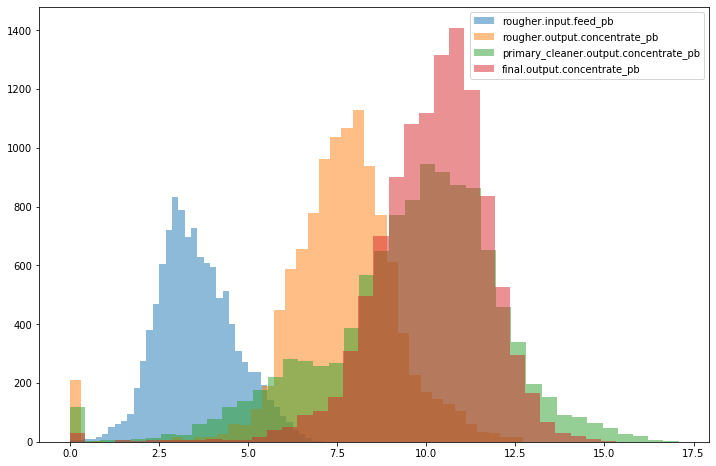

In [28]:
bins = 40
plt.figure(figsize=(12,8))
plt.tilte = 'Распределение свинца'
for col in df_concetrate_pb.columns:
    plt.hist(df_concetrate_pb[col], bins, alpha=0.5, label=col)
plt.legend(loc='upper right')
plt.show()

С каждой фазой концентрация свница увеличивается. Есть небольшие выбросы около нуля

## 2.2 Распределения размеров гранул сырья


Сначала взглянем на цифры

In [29]:
df_train['rougher.input.feed_size'].describe()

count    11017.000000
mean        57.215128
std         18.913146
min          9.659576
25%         48.397242
50%         53.843359
75%         61.461770
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [30]:
df_test['rougher.input.feed_size'].describe()

count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

Данные отличаются менее чем на 10 единиц (почти 2%), можно сказать что разница небольшая

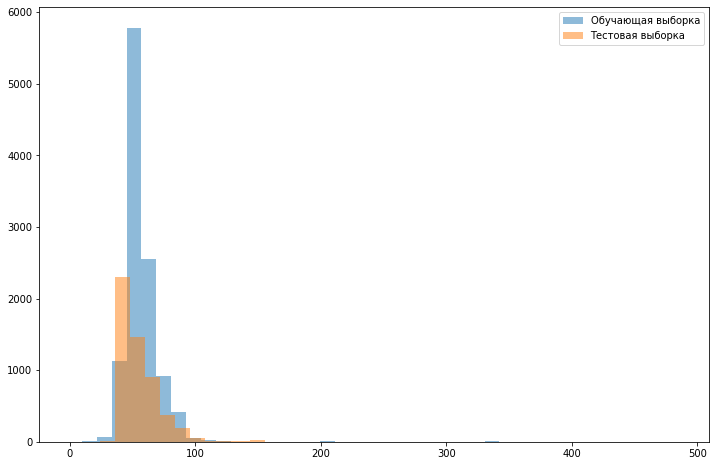

In [31]:
bins = 40
plt.figure(figsize=(12,8))
plt.tilte = 'Распределение сырья'
plt.hist(df_train['rougher.input.feed_size'], bins, alpha=0.5, label='Обучающая выборка')
plt.hist(df_test['rougher.input.feed_size'], bins, alpha=0.5, label='Тестовая выборка')
plt.legend(loc='upper right')
plt.show()

Графики очень близки, распределения на выборках совпадают 

## 2.3 Концентрация всех веществ на разных стадиях


In [32]:
df_train['rougher.input.feed_sum'] = df_train['rougher.input.feed_au'] + \
                                        df_train['rougher.input.feed_ag'] + \
                                        df_train['rougher.input.feed_pb']

df_train['rougher.output.concentrate_sum'] = df_train['rougher.output.concentrate_au'] + \
                                                df_train['rougher.output.concentrate_ag'] + \
                                                df_train['rougher.output.concentrate_pb']

df_train['primary_cleaner.output.concentrate_sum'] = df_train['primary_cleaner.output.concentrate_au'] + \
                                                df_train['primary_cleaner.output.concentrate_ag'] + \
                                                df_train['primary_cleaner.output.concentrate_pb']

df_train['final.output.concentrate_sum'] = df_train['final.output.concentrate_au'] + \
                                                df_train['final.output.concentrate_ag'] + \
                                                df_train['final.output.concentrate_pb']

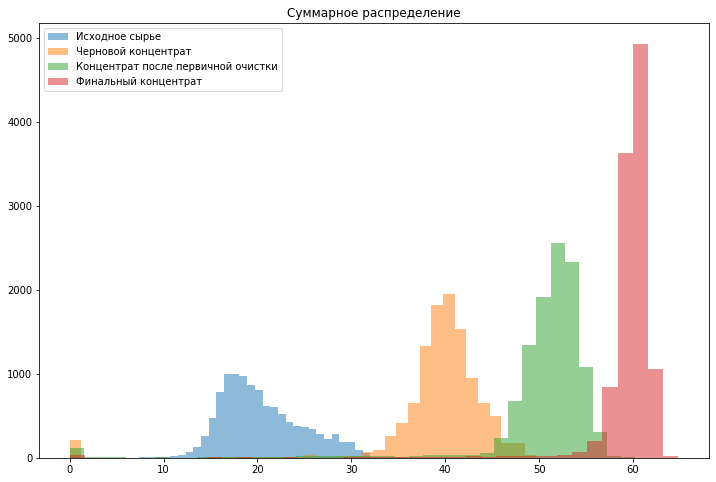

In [33]:
bins = 40
plt.figure(figsize=(12,8))
plt.title('Суммарное распределение')
plt.hist(df_train['rougher.input.feed_sum'], bins, alpha=0.5, label='Исходное сырье')
plt.hist(df_train['rougher.output.concentrate_sum'], bins, alpha=0.5, label='Черновой концентрат')
plt.hist(df_train['primary_cleaner.output.concentrate_sum'], bins, alpha=0.5, label='Концентрат после первичной очистки')
plt.hist(df_train['final.output.concentrate_sum'], bins, alpha=0.5, label='Финальный концентрат')
plt.legend(loc='upper left')
plt.show()

Общая сумма растет с каждой фазой. Есть выброс около нуля, его следут убрать

In [34]:
df_train = df_train[
    (df_train['rougher.input.feed_sum'] >= 7) | 
    (df_train['rougher.output.concentrate_sum'] >= 7) | 
    (df_train['primary_cleaner.output.concentrate_sum'] >= 7) | 
    (df_train['final.output.concentrate_sum'] >= 7)
]

# 3. Модель

## 3.1 Выделение признаков целевых и для обучения 

Признаки влияющие на результат: входное сырье в текущем этапе и характеристики тех.процесса (объем воздуха, уровень жидоксти и т.д.). Соотвественно удаляем "отвальные хвосты"


In [35]:
df_train = df_train.drop(columns=df_train.filter(regex=(".tail")).columns, axis=1)
df_test = df_test.drop(columns=df_test.filter(regex=(".tail")).columns, axis=1)
df_full = df_full.drop(columns=df_full.filter(regex=(".tail")).columns, axis=1)
#df_full.info()

<hr>

Признаками обучения будут являться все оставшие признаки, которые входят в тестовую выборку, а целевые - эффективность обогащения после флотации и в конце тех.процесса

In [36]:
features = df_train[[col for col in df_train.columns if col not in not_in_test_cols]].drop(columns='date', axis=1)
targets = df_train[['rougher.output.recovery', 'final.output.recovery']]

<hr>

Также будем строить 2 модели: для флотации и для чистки(финальная фаза), соотвественно разделим признаки:

Признаки для флотации:

In [37]:
feat_rough = features[features.filter(regex=("rougher.*")).columns]
targ_rough = targets['rougher.output.recovery']

С помощью меода корреляции выделим наиболее значимые признаки

In [38]:
def set_color_corr(val):
    # Красным будут выделены признаки, которые имеют коэф.корреляции больше 0.2
    color = 'red' if abs(val) >= 0.2 else 'black'
    return 'color: %s' % color

# соединим целевой и другие признаки для флотации
rough_data = feat_rough.merge(targ_rough, left_index=True, right_index=True)

# посмотрим на корреляцию с помощью методов Пирсона, Кендалла и Спирмана
rough_corr1 = rough_data.corr()['rougher.output.recovery']
rough_corr2 = rough_data.corr(method='kendall')['rougher.output.recovery']
rough_corr3 = rough_data.corr(method='spearman')['rougher.output.recovery']
df_corr_res = pd.DataFrame({'pearson':rough_corr1, 'kendall':rough_corr2, 'spearman':rough_corr3})
s = df_corr_res.style.applymap(set_color_corr)
s

,pearson,kendall,spearman
rougher.input.feed_ag,0.262754,0.34267,0.489433
rougher.input.feed_pb,0.181651,0.277949,0.397791
rougher.input.feed_rate,0.0470494,0.0239464,0.0465014
rougher.input.feed_size,0.0882628,0.0769576,0.132415
rougher.input.feed_sol,0.167466,0.200823,0.296505
rougher.input.feed_au,0.222114,0.307572,0.442057
rougher.input.floatbank10_sulfate,-0.152181,-0.0465986,-0.0651339
rougher.input.floatbank10_xanthate,0.247592,0.219219,0.321573
rougher.input.floatbank11_sulfate,-0.146995,-0.0450528,-0.0626931
rougher.input.floatbank11_xanthate,0.23177,0.201091,0.29367


Всего несколько признаков почти не влияют на целевой признак

<hr>

Признаки для фазы очистки:

In [88]:
feat_final = features[features.filter(regex=("^((?!rougher).)*$")).columns]
targ_final = targets['final.output.recovery']
#feat_final.info()

final_data = feat_final.merge(targ_final, left_index=True, right_index=True)
final_corr1 = final_data.corr()['final.output.recovery']
final_corr2 = final_data.corr(method='kendall')['final.output.recovery']
final_corr3 = final_data.corr(method='spearman')['final.output.recovery']
df_corr_res = pd.DataFrame({'pearson':final_corr1, 'kendall':final_corr2, 'spearman':final_corr3})
s = df_corr_res.style.applymap(set_color_corr)
s

,pearson,kendall,spearman
primary_cleaner.input.sulfate,0.380033,0.310209,0.44782
primary_cleaner.input.depressant,0.15158,0.119585,0.181532
primary_cleaner.input.feed_size,0.0240049,0.0142581,0.0203687
primary_cleaner.input.xanthate,0.207327,0.14883,0.223198
primary_cleaner.state.floatbank8_a_air,0.20342,0.143363,0.214767
primary_cleaner.state.floatbank8_a_level,0.0741333,0.0710716,0.105603
primary_cleaner.state.floatbank8_b_air,0.21081,0.141525,0.212884
primary_cleaner.state.floatbank8_b_level,0.0726512,0.0514126,0.0762799
primary_cleaner.state.floatbank8_c_air,0.210844,0.144061,0.214651
primary_cleaner.state.floatbank8_c_level,0.0804306,0.0784062,0.117102


Значищими признаками для очистки являются около 10 штук

<hr>

Удалим незначащие признаки

In [89]:
rough_features = [col for col in feat_rough if abs(rough_corr3[col]) >= 0.2 and col in df_test.columns and col != 'index']
feat_rough = feat_rough[rough_features]
feat_rough.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11016 entries, 0 to 16859
Data columns (total 18 columns):
rougher.input.feed_ag                 11016 non-null float64
rougher.input.feed_pb                 11016 non-null float64
rougher.input.feed_sol                11016 non-null float64
rougher.input.feed_au                 11016 non-null float64
rougher.input.floatbank10_xanthate    11016 non-null float64
rougher.input.floatbank11_xanthate    11016 non-null float64
rougher.state.floatbank10_a_air       11016 non-null float64
rougher.state.floatbank10_a_level     11016 non-null float64
rougher.state.floatbank10_b_air       11016 non-null float64
rougher.state.floatbank10_b_level     11016 non-null float64
rougher.state.floatbank10_c_air       11016 non-null float64
rougher.state.floatbank10_c_level     11016 non-null float64
rougher.state.floatbank10_d_air       11016 non-null float64
rougher.state.floatbank10_d_level     11016 non-null float64
rougher.state.floatbank10_e_air      

In [90]:
final_features = [col for col in feat_final if abs(final_corr3[col]) >= 0.2 and col in df_test.columns and col != 'index']
feat_final = feat_final[final_features]
feat_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11016 entries, 0 to 16859
Data columns (total 10 columns):
primary_cleaner.input.sulfate               11016 non-null float64
primary_cleaner.input.xanthate              11016 non-null float64
primary_cleaner.state.floatbank8_a_air      11016 non-null float64
primary_cleaner.state.floatbank8_b_air      11016 non-null float64
primary_cleaner.state.floatbank8_c_air      11016 non-null float64
secondary_cleaner.state.floatbank2_a_air    11016 non-null float64
secondary_cleaner.state.floatbank2_b_air    11016 non-null float64
secondary_cleaner.state.floatbank3_a_air    11016 non-null float64
secondary_cleaner.state.floatbank4_a_air    11016 non-null float64
secondary_cleaner.state.floatbank4_b_air    11016 non-null float64
dtypes: float64(10)
memory usage: 1.2 MB


## 3.2 Функция для вычисления итоговой sMAPE.




<img src="https://pictures.s3.yandex.net/resources/smape_1576239058.jpg" width="600">


<img src="https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg" width="600">

In [91]:
def smape(y_true, y_pred):
    N = len(y_true)
    y_true = list(y_true)
    y_pred = list(y_pred)
    list_i = []
    for i in range(N):
        list_i.append(abs(y_true[i] - y_pred[i])/(abs(y_true[i]) + abs(y_pred[i]))/2)
    return 100 * sum(list_i)/N

smape_score = make_scorer(smape, greater_is_better=False) #готовим функцию для передачи в кроссвиладцию

## 3.3 Построение модели

### 3.3.1 LinearRegression

In [92]:
lr_model_rough = LinearRegression()
lr_model_fin = LinearRegression()
rough_cvs = cross_val_score(lr_model_rough, feat_rough, targ_rough, cv=5, scoring=smape_score)
final_cvs = cross_val_score(lr_model_fin, feat_final, targ_final, cv=5, scoring=smape_score)
print('Оценка smape для модели после фазы флотации\t', rough_cvs.mean())
print('Оценка smape для модели после фазы очистки\t', final_cvs.mean())

Оценка smape для модели после фазы флотации	 -2.6986152495631996
Оценка smape для модели после фазы очистки	 -2.3430342223444045


### 3.3.2 DecisionTreeRegressor

In [93]:
model_rough = DecisionTreeRegressor()
model_fin = DecisionTreeRegressor()

params = {
    'max_depth': list(range(1, 26, 3)),
    'min_samples_split': list(range(2, 17, 2)),
    'min_samples_leaf': list(range(2, 16, 3)),
}

dtr_grid_rough = GridSearchCV(model_rough, param_grid=params, scoring=smape_score)
dtr_grid_rough.fit(feat_rough, targ_rough)
best_dtr_rough = dtr_grid_rough.best_estimator_

dtr_grid_fin = GridSearchCV(model_fin, param_grid=params, scoring=smape_score)
dtr_grid_fin.fit(feat_final, targ_final)
best_dtr_fin = dtr_grid_fin.best_estimator_

dtr_rough_cvs = cross_val_score(best_dtr_rough, feat_rough, targ_rough, cv=5, scoring=smape_score)
dtr_final_cvs = cross_val_score(best_dtr_fin, feat_final, targ_final, cv=5, scoring=smape_score)
print('Оценка smape для модели после фазы флотации\t', dtr_rough_cvs.mean())
print('Оценка smape для модели после фазы очистки\t', dtr_final_cvs.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Оценка smape для модели после фазы флотации	 -2.869298142621371
Оценка smape для модели после фазы очистки	 -2.4136196376948797


### 3.3.3 RandomForestRegressor

In [94]:
model_rough = RandomForestRegressor()
model_fin = RandomForestRegressor()

params = {
    'n_estimators': [100, 120, 150],
    'max_depth': list(range(4, 9, 1)),
}

rfr_grid_rough = GridSearchCV(model_rough, param_grid=params, scoring=smape_score)
rfr_grid_rough.fit(feat_rough, targ_rough)
best_rfr_rough = rfr_grid_rough.best_estimator_

rfr_grid_fin = GridSearchCV(model_fin, param_grid=params, scoring=smape_score)
rfr_grid_fin.fit(feat_final, targ_final)
best_rfr_fin = rfr_grid_fin.best_estimator_

rfr_rough_cvs = cross_val_score(best_rfr_rough, feat_rough, targ_rough, cv=5, scoring=smape_score)
rfr_final_cvs = cross_val_score(best_rfr_fin, feat_final, targ_final, cv=5, scoring=smape_score)
print('Оценка smape для модели после фазы флотации\t', rfr_rough_cvs.mean())
print('Оценка smape для модели после фазы очистки\t', rfr_final_cvs.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Оценка smape для модели после фазы флотации	 -2.524503735921532
Оценка smape для модели после фазы очистки	 -2.676075788942538


### 3.3.4 Итоговая оценка smape

Для оценки фазы флотации лучше использовать модель Случайного леса, а финалльной - Линейной регрессии. <br>
Получим оценку SMAPE на тестовой выборке

In [95]:
#получаем целевые признаки 
Y_test = df_full[df_full['date'].isin(df_test['date'])][['final.output.recovery', 'rougher.output.recovery']]
fin_test , rough_test = Y_test['final.output.recovery'], Y_test['rougher.output.recovery']

#получаем признаки по которым будем предсказать
fin_feat = df_full[df_full['date'].isin(df_test['date'])][final_features]
rough_feat = df_full[df_full['date'].isin(df_test['date'])][rough_features]

# обучаем лучшие модели и получаем предсказанные данные
lr_model_fin.fit(feat_final, targ_final)
fin_predict = lr_model_fin.predict(fin_feat)

best_rfr_fin.fit(feat_rough, targ_rough)
rough_predict = best_rfr_fin.predict(rough_feat)

# итоговая формула
res_smape = 0.25 * smape(rough_test, rough_predict) + 0.75 * smape(fin_predict, fin_test)

print('SMAPE:', res_smape)

SMAPE: 2.0190936005431306


# 4 Вывод

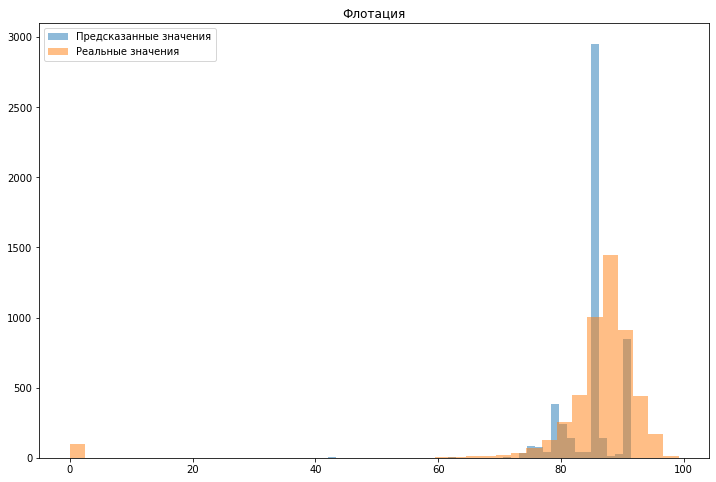

In [96]:
bins = 40
plt.figure(figsize=(12,8))
plt.title('Флотация')
plt.hist(rough_predict, bins, alpha=0.5, label='Предсказанные значения')
plt.hist(rough_test, bins, alpha=0.5, label='Реальные значения')
plt.legend(loc='upper left')
plt.show()

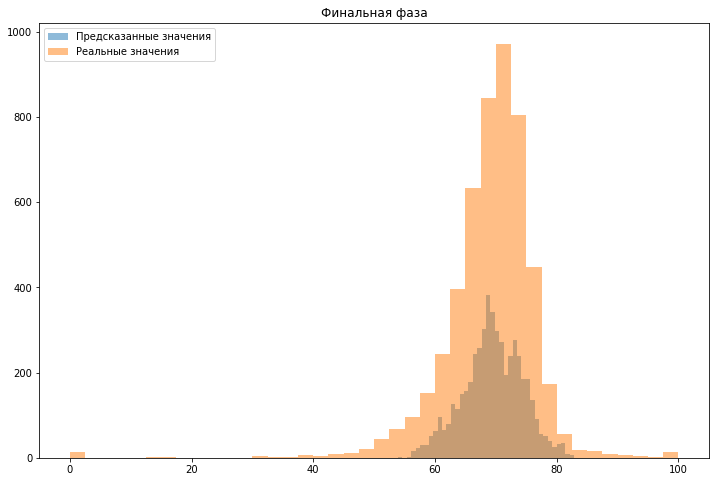

In [97]:
bins = 40
plt.figure(figsize=(12,8))
plt.title('Финальная фаза')
plt.hist(fin_predict, bins, alpha=0.5, label='Предсказанные значения')
plt.hist(fin_test, bins, alpha=0.5, label='Реальные значения')
plt.legend(loc='upper left')
plt.show()

Согласное оценке SMAPE - ошибка не такая большая. <br>
Но по графикам видно, что для флотации значения могут отличаться на 30%, а для финальной фазы: в 2 раза